# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Zidane Bürmann

Datum: 18.11.2023

Gruppe: 37

## Forschungsfrage



Wird die Abkühlung des Getränks dem Newtonschen Abkühlungsgesetz folgen?

## Versuchsaufbau und Durchführung

Ich habe kochendes Wasser (ca. 70 Grad) in eine Tasse getan und einen Sensor reingelegt. Der andere steht im Austausch mit der Umgebung, sodass er Umgebungstemperatur hat. Anschließend habe ich gewartet bis der Sensor die Temperatur des Wassers annimmt (wieder über check_sensors()) und dann die Messung gestartet. Nach knapp 15 Minuten habe ich die Messung beendet.



![Versuchsaufbau-Newton.jpg](figures/Versuchsaufbau-Newton.jpg)

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = '/home/jovyan/work/calorimetry_home/archive/Newton_Experiment/Newton_Experiment.h5'

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

f = h5py.File(path, 'r')
metadata = ['authors','created','experiment','group_number']
infos = []
for i in metadata:
    infos.append(f.attrs[i])

temperature_sensor1 = f['RawData']['Sensors']['1ee80bc8-0fb4-67b3-a290-2becf8e923b0']['Temperatures'][:]
temperature_sensor2 = f['RawData']['Sensors']['1ee80bd6-8100-61b5-8a1e-eb20a660622b']['Temperatures'][:]

timestamp_sensor1 = f['RawData']['Sensors']['1ee80bc8-0fb4-67b3-a290-2becf8e923b0']['Timestamps'][:]
timestamp_sensor2 = f['RawData']['Sensors']['1ee80bd6-8100-61b5-8a1e-eb20a660622b']['Timestamps'][:]
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


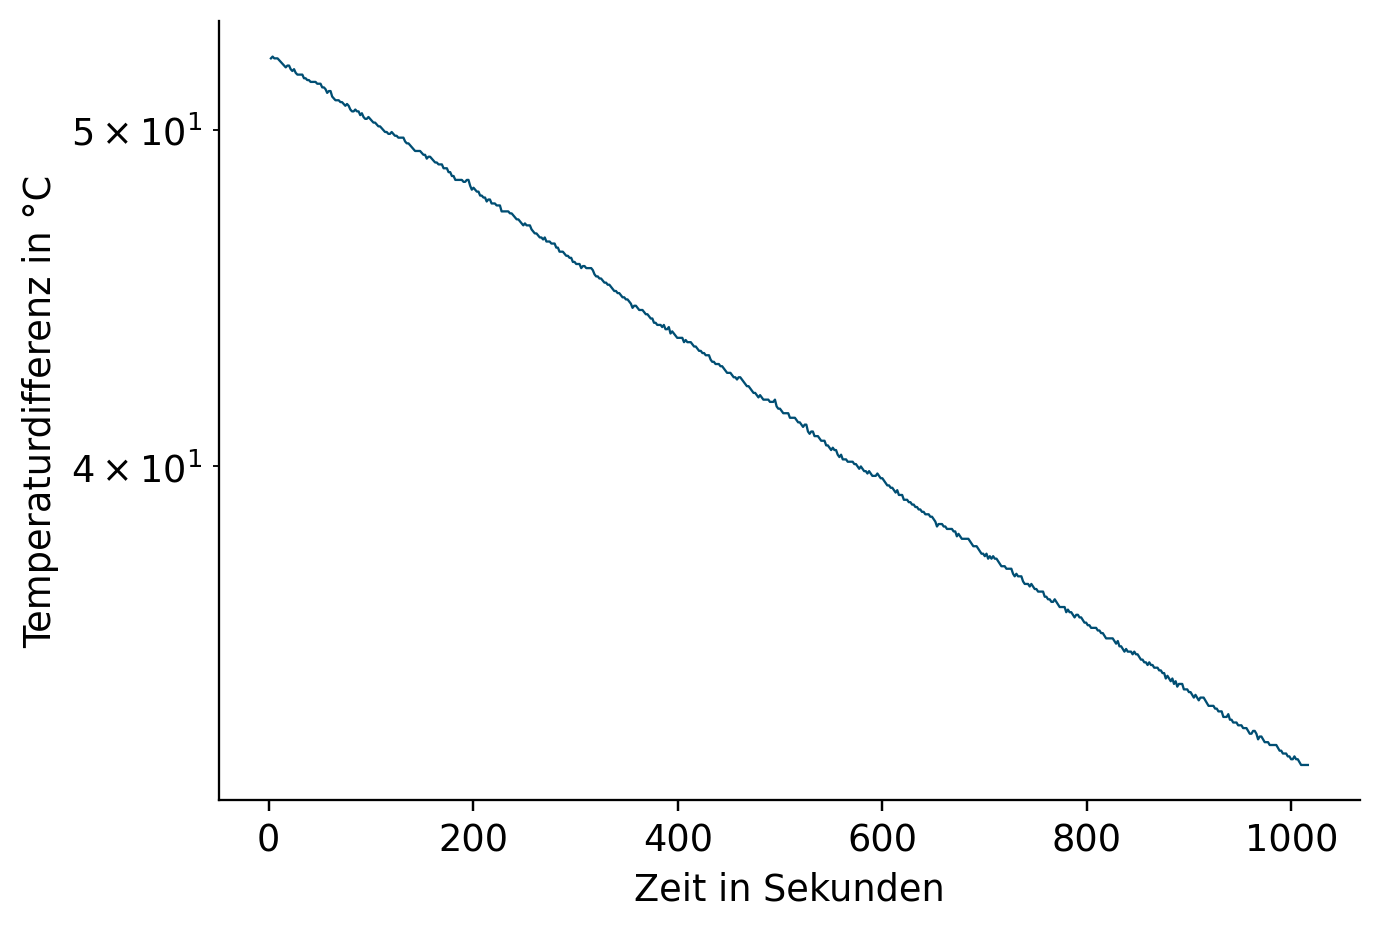

In [4]:
# TODO: Use the temperature and time data for plotting
delta_T = []

#Fehler abfangen, falls man die Messung zum Zeitpunkt abbricht, bei der Sensor 1 die letzte Temperatur gemessen hat und so
#einen Eintrag mehr hat als Sensor 2
for i,j in zip(temperature_sensor1, temperature_sensor2):
    try:
        delta_T.append(i - j)
    except:
        pass
plt.plot(timestamp_sensor1, delta_T)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperaturdifferenz in °C')
plt.yscale('log')

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = max(temperature_sensor1[0], temperature_sensor2[0])
T_2 = min(temperature_sensor1[-1], temperature_sensor2[-1])
T_t = delta_T

irr, K = np.polyfit(timestamp_sensor1, np.log(delta_T), 1)

# DONE #

#### (iV) Ergebnis

In [6]:
# TODO: Print result
print('Der Transportkoeffizient beträgt', K)

# DONE #

Der Transportkoeffizient beträgt 3.9653259600120623


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Wie man dem Graphen entnehmen kann, ist der Verlauf auf der logarithmischen Skala linear, was auf einen exponentiellen Verlauf hindeutet. Auch existiert eine proportionale Beziehung zwischen der Abkühlrate (diese entspricht der Steigung) und der Temperaturdifferenz. Somit ist das Newtonsche Abkühlungsgesetz zu bestätigen und die Wissenschaft siegt und die Forschungsfrage wird mit einem "ja" beantwortet.

## Fazit


Der Versuch hätte sich durch das Gesetz gut vorhersagen lassen können, was auf eine Sicherheit und Anwendbarkeit der Formel schließt. Diese kann bei bekannten Bedingungen sicher angewandt werden und ermöglicht es, Verhalten von Flüssigkeiten sicher zu beschreiben. Dies kann somit für alltägliche Anwendungen oder zu Forschungszwecken verwendet werden.